In [1]:
import os

#counting the number of files in train folder
path, dirs, files = next(os.walk('/home/mitraa/Jupyter Notebook/Dataset1/train'))
file_count = len(files)
print('Number of images:', file_count)

Number of images: 25000


printing the name of images

In [2]:
file_names = os.listdir('/home/mitraa/Jupyter Notebook/Dataset1/train')
print(file_names)

['dog.10714.jpg', 'dog.8585.jpg', 'cat.2527.jpg', 'cat.10093.jpg', 'dog.4454.jpg', 'cat.10685.jpg', 'cat.10793.jpg', 'dog.5767.jpg', 'dog.3154.jpg', 'cat.6060.jpg', 'cat.879.jpg', 'dog.2622.jpg', 'cat.4220.jpg', 'cat.768.jpg', 'cat.7777.jpg', 'dog.4592.jpg', 'cat.4485.jpg', 'cat.7382.jpg', 'cat.8095.jpg', 'dog.802.jpg', 'dog.8411.jpg', 'cat.725.jpg', 'dog.1275.jpg', 'dog.4776.jpg', 'cat.7198.jpg', 'cat.4785.jpg', 'cat.4675.jpg', 'cat.5904.jpg', 'cat.1590.jpg', 'dog.5759.jpg', 'cat.4828.jpg', 'dog.639.jpg', 'dog.6728.jpg', 'cat.4435.jpg', 'dog.2340.jpg', 'cat.9700.jpg', 'dog.12482.jpg', 'cat.8496.jpg', 'cat.1825.jpg', 'dog.2597.jpg', 'cat.7629.jpg', 'dog.11863.jpg', 'dog.5248.jpg', 'dog.9432.jpg', 'cat.7942.jpg', 'cat.7553.jpg', 'cat.462.jpg', 'dog.3311.jpg', 'dog.5605.jpg', 'dog.10278.jpg', 'cat.2640.jpg', 'cat.9511.jpg', 'cat.4419.jpg', 'dog.5431.jpg', 'cat.12193.jpg', 'cat.11519.jpg', 'cat.3018.jpg', 'dog.10940.jpg', 'dog.7476.jpg', 'cat.269.jpg', 'dog.3425.jpg', 'dog.6791.jpg', 'cat

Importing the dependencies

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

In [11]:
def cv2_imshow(image):
    image = cv2.imread('/home/mitraa/Jupyter Notebook/Dataset1/train')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

Displaying the images of dogs and cats

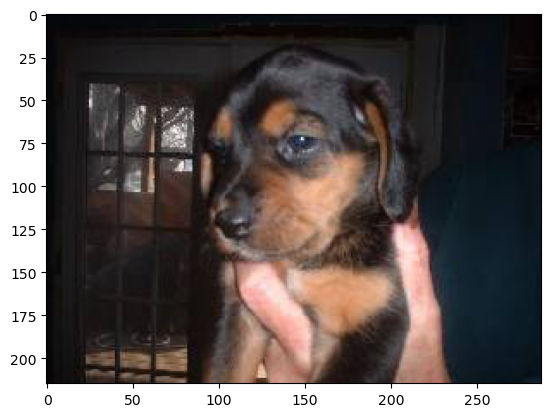

In [23]:
# display dog image
img = mpimg.imread('/home/mitraa/Jupyter Notebook/Dataset1/train/dog.3620.jpg')
imgplot = plt.imshow(img)
plt.show()

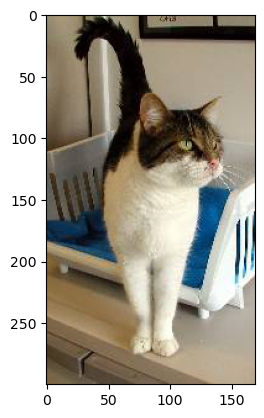

In [22]:
# display cat image
img = mpimg.imread('/home/mitraa/Jupyter Notebook/Dataset1/train/cat.425.jpg')
imgplot = plt.imshow(img)
plt.show()

In [26]:
file_names = os.listdir('/home/mitraa/Jupyter Notebook/Dataset1/train')

for i in range(5):
    name = file_names[i]
    print(name[0:3])

dog
dog
cat
cat
dog


In [ ]:
file_names = os.listdir('/home/mitraa/Jupyter Notebook/Dataset1/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
    name = img_file[0:3]
    if name == 'dog':
        dog_count += 1
    else:
        cat_count += 1

print('number of dog images:', dog_count)
print('number of c images:', dog_count)

Resizing all the imges